# Introduction and Problem Statement:
Along Peachtree there exists the intersections of 10th, 11th, 13th, and 14th Streets. This simulation will seek to compute the average time cars spent traversing this segment of the road. 

# Assumptions:
 - The variations in the shape and size of each intersection is ignored and all intersections are treated equally due to the difficulty in quantifying geographic differences in incline and shape. For example, 10th and Peachtree is shaped more square on flat land whereas 11th and Peachtee is slightly like a rhombus and has a distinct incline going westbound.

 - We assume that throughout the day the intersections themselves do not change geometric shape and that the vehicles that pass through them behave similarly, which means that the traffic signals and the numbers are the determining factors for travel time distributions.

 - We assume our first event is of the first car in the entire roadway. 
    
# Details:

 - .1 second time intervals - the same as the dataset

 - We assume that for any given left or right turn there is a possiblity that there is an incoming car that would delay that turn and in turn the cars behind the car trying to make that turn would also get delayed. Our principal RNG element is here.
    
    
# Simplifications:

 - As specified in the specifications pdf, the traffic is one-way, therefore we will choose to simulate the traffic going southbound from 10th to 14th street through Peachtree.

 - The left turn lanes are infinitely long, so we don't have to deal with delays on the through lanes. 

 - Every car travels the same speed regardless of size. This is something we will lilely change in a later iteration of the simulation.


In [1]:
from queue import PriorityQueue
from queue import Queue
import time
#Graphing and Analysis imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
#Reading CSV file imports
import pandas as pd
import csv

#Initializing simulation
q = PriorityQueue();

south10 = [];
south14 = [];
south11 = [];
south12 = [];

currentTime = 0;

vehicles = {};
valList = []

In [2]:
#Initialize traffic light timings going southbound
def intersections():
    #GLT, YLT, RLT, GTR, YTR, RTR/LT
    south10 = [7, 3.6, 2.2, 34.7, 3.6, 49.3];
    south14 = [11.6, 3.6, .5, 36.6, 3.2, 45.3];
    #GTR, YTR, RTR/LT
    south11 = [41.5, 3.2, 55.4];
    south12 = [61.4, 3.2, 35.7];
    

In [3]:
#Populate our event list
def getEvents():
    df = pd.read_csv('trajectories.csv', usecols=['Vehicle_ID', 'Frame_ID','Tot_Frames', 'Epoch_ms', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'Veh_Len', 'Veh_Wid', 'Veh_Class', 'Veh_Velocity', 'Vehicle_Acc', 'Lane_ID', 'Org_Zone', 'Dest_Zone', 'Intersection', 'Section', 'Direction', 'Movement', 'Preceding_Veh', 'Following_Veh', 'Spacing', 'Headway']);
    counter = 0;
    events = {}

    for i, row in enumerate(df.values):
        events[counter] = {}
        counter = counter + 1;

    counter = 0;
    for i, row in enumerate(df.values):
        events[counter] = q.put((row[3], {
            'Vehicle_ID': row[0],
            'Frame_ID': row[1],
            'Tot_Frames': row[2],
            'Epoch_ms': row[3],
            'Local_X': row[4],
            'Local_Y': row[5],
            'Global_X': row[6],
            'Global_Y': row[7],
            'Veh_Len': row[8],
            'Veh_Wid': row[9],
            'Veh_Class': row[10],
            'Veh_Velocity': row[11],
            'Vehicle_Acc': row[12],
            'Lane_ID': row[13],
            'Org_Zone': row[14],
            'Dest_Zone': row[15],
            'Intersection': row[16],
            'Section': row[17],
            'Direction': row[18],
            'Movement': row[19],
            'Preceding_Veh': row[20],
            'Following_Veh': row[21],
            'Spacing': row[22],
            'Headway': row[23]
        }))
        counter = counter + 1


In [4]:
#Executes the event
def executeEvent(event):
    #Run the different computations
    getCarTravelTime(event);  
    
    #TODO:
    #RNG some cars take right or left turn
        #Some cars have to wait for that left or right turn to happen
            #Left and right turns have some % chance of happening some x number of seconds
            #Cars behind them are delayed
        
    #Get average time of all cars in simulation
    #Get average time of cars spent waiting at red light
    #Get average number of cars waiting for red light
    

In [5]:
#Get total time of all cars spent on Peachtree individually
def getCarTravelTime(event):
    global vehicles
    global valList
    if (event['Vehicle_ID'] not in vehicles ):
        vehicles[event['Vehicle_ID']] = 0;
    else:
        vehicles[event['Vehicle_ID']] = vehicles[event['Vehicle_ID']] + 1
    valList = vehicles.values()

In [6]:
#Graphng average travel time from 10th to 14th street
def graphing():
    #Get average car time in simulation in array format
    valList.sort()
    hmean = np.mean(valList)
    hstd = np.std(valList)
    pdf = stats.norm.pdf(valList, hmean, hstd)
    plt.xlabel('Time in deciseconds')
    plt.title("Time spent traveling down Peachtree Street")
    plt.plot(valList, pdf) 


In [7]:
#Start Program
def main():
    #Initialize event list with first arrival
    events = getEvents();
    #Start timer
    t0 = time.clock();
    wt0 = time.time();
    #Run Simulation
    runSimulation(events, q);
    #End Timer
    t1 = time.clock();
    wt1 = time.time();
    graphing();
    

In [8]:
#Our simulation engine
def runSimulation(events,q):
    global currentTime;
    while not q.empty():
        next_item = q.get();                             #Get next event
        currentTime = currentTime + .1                   #Advance simulation time
        executeEvent(next_item[1]);                      #Update state variables and counters and generate future events


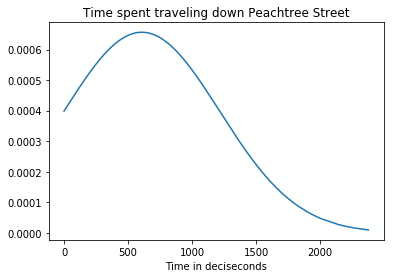

In [9]:
main()